In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [251]:
UNDEFINE = 0
NOISE = 1

class Point(object):
    def __init__(self, num, point):
        self.num = num
        self.point = point
        self.label = UNDEFINE

class DBSCAN(object):
    def __init__(self, dist ,eps, minPts):
        self.dist = dist
        self.eps = eps
        self. minPts = minPts
        self.clusters = []
        self.DB = []
        
    def _construct(self, DB):
        i = 0
        for d in DB:
            p = Point(i, d)
            self.DB.append(p)
            i+=1
        
    def label(self, point):
        return point.label

    def RangeQuery(self, Q):
        Neighbors = set()
        for P in self.DB:
            if self.dist(Q.point, P.point) <= self.eps:
                Neighbors.add(P)
        return Neighbors
    
    def _add(self):
        self.clusters = []
        for P in self.DB:
            self.clusters.append(P.label)
        self.clusters = np.asarray(self.clusters)

    def fit(self, DB):
        C = 0
        self._construct(DB)
        i = 0
        for P in self.DB:
#             if i % 100 == 0:
#                 print(i*1.0/DB.shape[0])
            i+=1
            if self.label(P) is not UNDEFINE:
                continue
            N = self.RangeQuery(P)
            if len(N) < self.minPts:
                P.label = NOISE
                continue
            C += 1
            P.label = C
            N.remove(P)
            while len(N) != 0:
#                 print(len(N))
                Q = list(N)[0]
                if Q.label == NOISE:
                    Q.label = C
                    N.remove(Q)
                    continue
                if Q.label is not UNDEFINE:
                    N.remove(Q)
                    continue
                Q.label = C
                N1 = self.RangeQuery(Q)
                if len(N1) >= self.minPts:
                    N = N | N1
                N.remove(Q)
        self._add()

def dist(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

In [254]:
np.random.seed(7)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [255]:
def dbscan_plot(data, eps=0.1):
    dbscan = DBSCAN(dist, eps, 5)
    dbscan.fit(data[0])
    k = np.unique(dbscan.clusters)
    for c in range(len(k)):
        sub_db = data[0][dbscan.clusters == c+1]
        plt.scatter(sub_db[:,0], sub_db[:,1])
    plt.show()

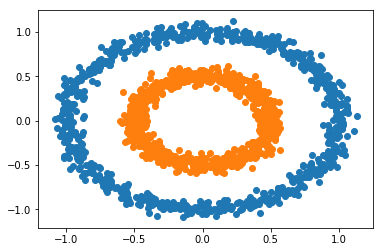

In [272]:
dbscan_plot(noisy_circles, 0.1)

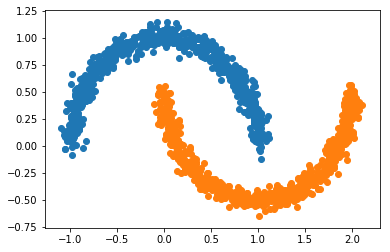

In [273]:
dbscan_plot(noisy_moons, 0.1)

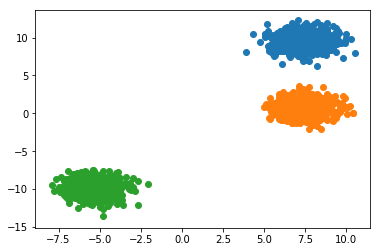

In [258]:
dbscan_plot(blobs, 1)

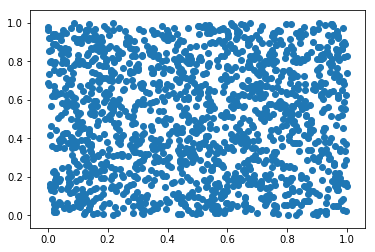

In [269]:
dbscan_plot(no_structure, 0.3)

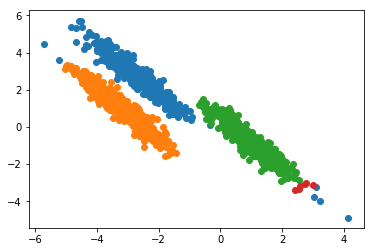

In [268]:
dbscan_plot(aniso, 0.3)

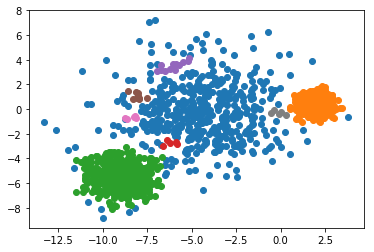

In [267]:
dbscan_plot(varied, 0.5)